In [1]:
%matplotlib notebook
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from trimesh import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X, VColors, ITris = load_off("medres.off")
mean = np.mean(X, axis=0)
X -= mean
print(mean)
pca = PCA(n_components=3)
pca.fit(X)

[ 0.04158746 -0.99674172  1.64996497]


PCA(n_components=3)

(2941, 3)


<IPython.core.display.Javascript object>


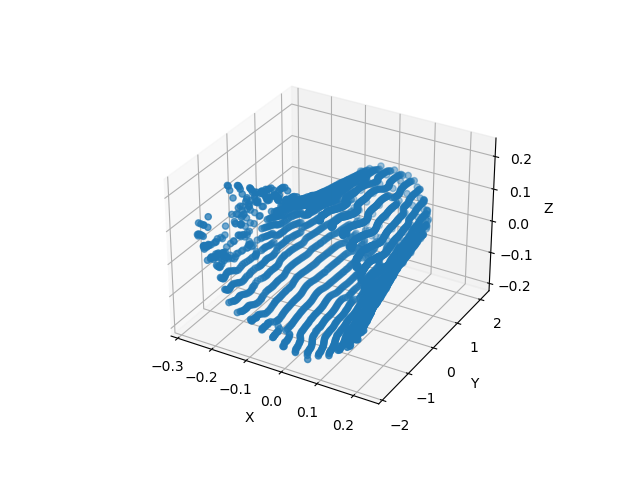

Text(0.5, 0, 'Z')

In [3]:
ARot = pca.components_
ARot = ARot[[1, 0, 2], :]
ARot[0, :] *= -1
Y = X.dot(ARot.T) # (AX^T)^T = XA^T
print(Y.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

In [4]:
ATrans = np.eye(4)
ATrans[0:3, -1] = -mean
ARot4x4 = np.eye(4)
ARot4x4[0:3, 0:3] = ARot
A = ARot4x4.dot(ATrans)
print(A)
print(-mean)

[[-0.11672829  0.20894461 -0.97093597  1.81512858]
 [-0.01450253 -0.97787345 -0.20869402 -0.62974632]
 [-0.993058   -0.01027947  0.11717572 -0.16228305]
 [ 0.          0.          0.          1.        ]]
[-0.04158746  0.99674172 -1.64996497]


In [5]:
print(A.flatten())

[-0.11672829  0.20894461 -0.97093597  1.81512858 -0.01450253 -0.97787345
 -0.20869402 -0.62974632 -0.993058   -0.01027947  0.11717572 -0.16228305
  0.          0.          0.          1.        ]


In [6]:
fin = open("medres_orig.obj")
lines = fin.readlines()
fin.close()
fout = open("medres.obj", "w")
idx = 0
for l in lines:
    l = l.rstrip()
    if l[0:2] == "f ":
        fields = l.split()[1::]
        s = "f "
        for f in fields:
            x = f.split("/")
            s += x[0] + "/" + x[1] + " "
        fout.write(s + "\n")
    elif l[0:2] == "v ":
        y = Y[idx, :]
        fout.write("v {:.6f} {:.6f} {:.6f}\n".format(*y))
        idx += 1
    elif l[0:2] == "vn":
        continue
    else:
        fout.write(l + "\n")
fout.close()